In [1]:
%matplotlib inline
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
plt.rcParams['figure.figsize'] = (8, 4)

In [4]:
def interval(n, mean, std):
    low, high = st.t.interval(0.95, 100-1, loc=mean, scale=std)
    return low, high

def plot_bumps(bumps, order, color):
    f, ax = plt.subplots(figsize=(6,len(bumps)/4))
    #plt.grid()
    a=ax.get_yticks().tolist()
    y = range(len(bumps))
    means = [np.mean(bumps[city]) for city in order]
    width = [np.max(bumps[city])-np.min(bumps[city]) for city in order]
    left = [np.min(bumps[city]) for city in order]
    #labels = [x[x.find("_"):].replace("_", " ") for x in order]
    ax.barh(y, width,height=.25,left=left, tick_label = order, alpha=.5, color='black')
    mean_pos = [pos for pos in y]
    ax.scatter(means,mean_pos, s=5, color='black', facecolor='black', alpha=1)
    return f, ax

def plot_bumps2(bumps, order, ax, height=4):
    #a=ax.get_yticks().tolist()
    y = range(len(bumps))
    y_pos = np.arange(0, height, len(bumps)/height)
    means = [np.mean(bumps[city]) for city in order]
    width = [np.max(bumps[city])-np.min(bumps[city]) for city in order]
    left = [np.min(bumps[city]) for city in order]
    #labels = [x[x.find("_"):].replace("_", " ") for x in order]
    ax.barh(y_pos, width,height=.25,left=left, tick_label = order, alpha=.5, color='black')
    mean_pos = [pos for pos in y_pos]
    ax.scatter(means,mean_pos, s=5, color='black', facecolor='black', alpha=1)
    return f, ax

In [9]:
for k,v in results.items():
    print(k, np.mean(v))

fall 0.15589301106582082
summer 0.19475373216932335
winter 0.12521746158242913
spring 0.16536297496855204


In [12]:
results

{'1-10 acres': [0.11472264350773287,
  0.12461761098934154,
  0.12551167431450327,
  0.12805631864760603,
  0.12252351593659228],
 '>100 acres': [0.13084495336498048,
  0.12705553664694236,
  0.12880077497983056,
  0.13220354221293285,
  0.12786786043383636],
 '10-100 acres': [0.07961949429900717,
  0.07756543958249118,
  0.08337921863665088,
  0.06752940800897456,
  0.08438186476866871],
 '<1 acre': [0.09425190880783951,
  0.1026447778398003,
  0.10307146959840985,
  0.1039210558804804,
  0.09764765382976748]}

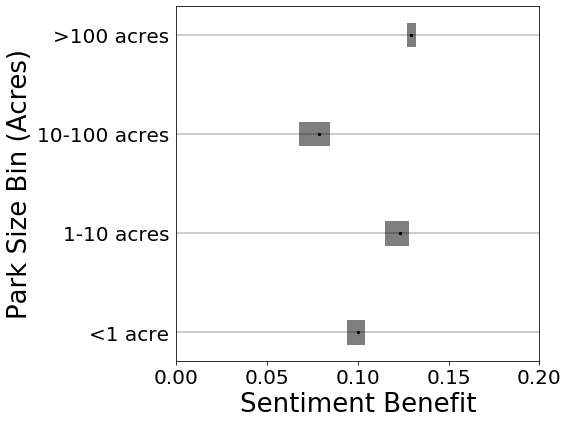

In [25]:
fig, ax1 = plt.subplots(1,1,figsize=(8,6))#, sharey=False)


new_labels = {'acres_gt_100':">100 acres", 'acres_10_100':"10-100 acres", 'acres_lt_1':"<1 acre", 'acres_1_10':"1-10 acres"}
order =['<1 acre', '1-10 acres', '10-100 acres','>100 acres']
results_path = "./results/city_combined_0421/bootstrap_parktype.json"
with open(results_path) as f:
    results = json.load(f)
new_results = {}
for k,v in results.items():
    new_results[new_labels[k]]  = v
results = new_results
mean_bumps = {k:np.mean(v) for k,v in results.items()}
plot_bumps2(results,order,ax1)
ax1.set_xlabel("Sentiment Benefit", fontsize=26)
ax1.set_xlim(0,.15)
ax1.xaxis.set_ticks(np.arange(0, .25, .05))
ax1.tick_params(axis='x', labelsize=20);
yax1 = ax1.get_yaxis()
yax1.set_tick_params()
ax1.set_ylabel("Park Size Bin (Acres)", fontsize=26)
ax1.hlines(range(len(results)), 0,.25, lw=.4)
ax1.tick_params(axis='y', labelsize=20, which="both",left=False)
plt.tight_layout()
plt.savefig("present/acres.png", dpi=300)

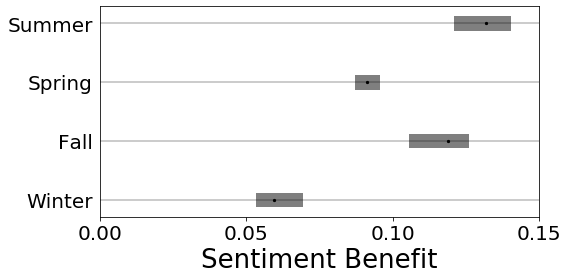

In [45]:
fig, ax2 = plt.subplots(1,1,figsize=(8,4))#, sharey=False)
season_order =['winter', 'fall','spring', 'summer']
results_path = "./results/city_combined_0421/bootstrap_season.json"
with open(results_path) as f:
    results = json.load(f)
mean_bumps = {k:np.mean(v) for k,v in results.items()}
plot_bumps2(results,season_order, ax2)

ax2.set_xlabel("Sentiment Benefit", fontsize=26)
ax2.set_xlim(0,.15)
ax2.xaxis.set_ticks(np.arange(0, .2, .05))

#ax2.set_ylabel("Season", fontsize=18)
ax2.set_yticklabels(["Winter","Fall", "Spring","Summer"])
#ax2.tick_params(axis="y",direction="in", pad=0)
ax2.hlines(range(len(results)), 0,.25, lw=.4)
ax2.tick_params(axis='x', labelsize=20);
ax2.tick_params(axis='y', labelsize=20, which="both",left=False)
plt.tight_layout()
plt.savefig("present/season.png", dpi=300)


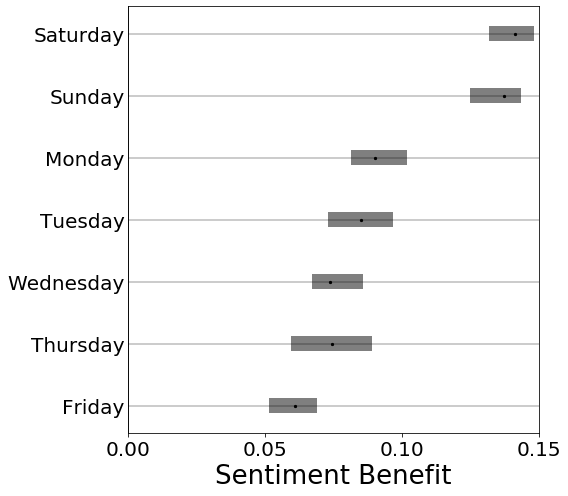

In [31]:
fig, ax3 = plt.subplots(1,1,figsize=(8,7))#, sharey=False)

results_path = "./results/city_combined_0421/bootstrap_day_of_week.json"
with open(results_path) as f:
    results = json.load(f)
    

mean_bumps = {k:np.mean(v) for k,v in results.items()}
#order = sorted(mean_bumps, key=mean_bumps.get, reverse=False)
order = ['Friday',  'Thursday', 'Wednesday','Tuesday', 'Monday', 'Sunday', 'Saturday']
plot_bumps2(results,order, ax3, 7)
ax3.set_xlim(0,.15)
ax3.set_xlabel("Sentiment Benefit", fontsize=26)
#ax3.set_ylabel("Day of week", fontsize=26)
ax3.set_xlim(0,.15)
ax3.xaxis.set_ticks(np.arange(0, .2, .05))

#ax3.hlines(range(len(results)), .1,.25, lw=.3)
yax3 = ax3.get_yaxis()
yax3.set_tick_params(pad=0)
ax3.axvline(0, color='black')
ax3.tick_params(axis='x', labelsize=20);
ax3.tick_params(axis='y', labelsize=20, which="both",left=False)
ax3.hlines(range(len(results)), 0,.25, lw=.4)
plt.tight_layout();
plt.savefig("present/dayweek.png", dpi=300)

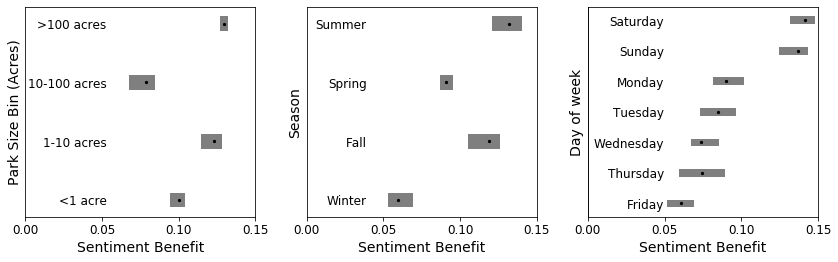

In [6]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,4), sharey=False)


new_labels = {'acres_gt_100':">100 acres", 'acres_10_100':"10-100 acres", 'acres_lt_1':"<1 acre", 'acres_1_10':"1-10 acres"}
order =['<1 acre', '1-10 acres', '10-100 acres','>100 acres']
results_path = "./results/city_combined_0421/bootstrap_parktype.json"
with open(results_path) as f:
    results = json.load(f)
new_results = {}
for k,v in results.items():
    new_results[new_labels[k]]  = v
results = new_results
mean_bumps = {k:np.mean(v) for k,v in results.items()}
plot_bumps2(results,order,ax1)
ax1.set_xlabel("Sentiment Benefit", fontsize=14)
ax1.set_xlim(0,.15)
ax1.xaxis.set_ticks(np.arange(0, .2, .05))
ax1.tick_params(axis='x', labelsize=12);
yax1 = ax1.get_yaxis()
yax1.set_tick_params(pad=-85)
ax1.set_ylabel("Park Size Bin (Acres)", fontsize=14)
ax1.tick_params(axis='y', labelsize=12, which="both",left=False)



season_order =['winter', 'fall','spring', 'summer']
results_path = "./results/city_combined_0421/bootstrap_season.json"
with open(results_path) as f:
    results = json.load(f)
mean_bumps = {k:np.mean(v) for k,v in results.items()}
plot_bumps2(results,season_order, ax2)

ax2.set_xlabel("Sentiment Benefit", fontsize=14)
ax2.set_xlim(0,.15)
ax2.xaxis.set_ticks(np.arange(0, .2, .05))

ax2.set_ylabel("Season", fontsize=14)
ax2.set_yticklabels(["Winter","Fall", "Spring","Summer"])
ax2.tick_params(axis="y",direction="in", pad=-60)
ax2.tick_params(axis='x', labelsize=12);
ax2.tick_params(axis='y', labelsize=12, which="both",left=False)


results_path = "./results/city_combined_0421/bootstrap_day_of_week.json"
with open(results_path) as f:
    results = json.load(f)
    

mean_bumps = {k:np.mean(v) for k,v in results.items()}
#order = sorted(mean_bumps, key=mean_bumps.get, reverse=False)
order = ['Friday',  'Thursday', 'Wednesday','Tuesday', 'Monday', 'Sunday', 'Saturday']
plot_bumps2(results,order, ax3, 7)
ax3.set_xlim(0,.15)
ax3.set_xlabel("Sentiment Benefit", fontsize=14)
ax3.set_ylabel("Day of week", fontsize=14)
ax3.set_xlim(0,.15)
ax3.xaxis.set_ticks(np.arange(0, .2, .05))

#ax3.hlines(range(len(results)), .1,.25, lw=.3)
yax3 = ax3.get_yaxis()
yax3.set_tick_params(pad=-80)
ax3.axvline(0, color='black')
ax3.tick_params(axis='x', labelsize=12);
ax3.tick_params(axis='y', labelsize=12, which="both",left=False)


plt.tight_layout(pad=2);
plt.savefig("figures/acres_season_day.png", dpi=300)

In [5]:
order

['Friday', 'Wednesday', 'Thursday', 'Tuesday', 'Monday', 'Sunday', 'Saturday']

In [12]:
results_path = "./results/city_combined_0421/bootstrap_parktype.json"
with open(results_path) as f:
    results = json.load(f)


mean_bumps = {k:np.mean(v) for k,v in results.items()}

In [13]:
mean_bumps

{'acres_1_10': 0.1230863526791552,
 'acres_gt_100': 0.1293545335277045,
 'acres_10_100': 0.0784950850591585,
 'acres_lt_1': 0.10030737319125951}